In [34]:
## Importing Packages

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
## Setting the working directory

#path = ""
#os.chdir("path")

## Reading in the data
stellar = pd.read_csv('stellar_classification.csv')

In [3]:
## Data Preview
stellar.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


### Data Dictionary
#### The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.
##### From Kaggle
1. obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
2. alpha = Right Ascension angle (at J2000 epoch)
3. delta = Declination angle (at J2000 epoch)
4. u = Ultraviolet filter in the photometric system
5. g = Green filter in the photometric system
6. r = Red filter in the photometric system
7. i = Near Infrared filter in the photometric system
8. z = Infrared filter in the photometric system
9. run_ID = Run Number used to identify the specific scan
10. rereun_ID = Rerun Number to specify how the image was processed
11. cam_col = Camera column to identify the scanline within the run
12. field_ID = Field number to identify each field
13. spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
14. class = object class (galaxy, star or quasar object)
15. redshift = redshift value based on the increase in wavelength
16. plate = plate ID, identifies each plate in SDSS
17. MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
18. fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation



Citation
fedesoriano. (January 2022). Stellar Classification Dataset - SDSS17. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17.

In [35]:
## Basic data information
stellar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87939 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       87939 non-null  float64
 1   alpha        87939 non-null  float64
 2   delta        87939 non-null  float64
 3   u            87939 non-null  float64
 4   g            87939 non-null  float64
 5   r            87939 non-null  float64
 6   i            87939 non-null  float64
 7   z            87939 non-null  float64
 8   run_ID       87939 non-null  int64  
 9   rerun_ID     87939 non-null  int64  
 10  cam_col      87939 non-null  int64  
 11  field_ID     87939 non-null  int64  
 12  spec_obj_ID  87939 non-null  float64
 13  class        87939 non-null  object 
 14  redshift     87939 non-null  float64
 15  plate        87939 non-null  int64  
 16  MJD          87939 non-null  int64  
 17  fiber_ID     87939 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usa

In [40]:
## Checking for any NAs
stellar.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [36]:
## High Level Statistical Summary
stellar.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,8.793900e+04,87939.000000,87939.000000,87939.000000,87939.000000,87939.000000,87939.000000,87939.000000,87939.000000,87939.0,87939.000000,87939.000000,8.793900e+04,87939.000000,87939.000000,87939.000000,87939.000000
mean,1.237665e+18,185.956999,27.886594,22.076154,20.630654,19.640179,19.079038,18.761662,4502.700110,301.0,3.573614,183.690729,5.882767e+18,0.583572,5224.834306,55649.478081,459.014806
std,7.925865e+12,89.821192,17.910740,2.255119,2.039452,1.849442,1.751695,1.758200,1845.400909,0.0,1.583019,145.641531,3.292846e+18,0.734421,2924.619784,1773.173905,270.713085
min,1.237646e+18,0.005528,0.000308,10.996230,10.498200,9.822070,9.469903,9.612333,109.000000,301.0,1.000000,11.000000,2.995793e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,134.318862,12.838164,20.341365,18.960475,18.127585,17.726360,17.452335,3225.000000,301.0,2.000000,82.000000,2.911694e+18,0.060015,2586.000000,54389.000000,234.000000
50%,1.237663e+18,187.060173,27.778504,22.166240,21.097100,20.130540,19.411060,19.009440,4188.000000,301.0,4.000000,146.000000,5.706116e+18,0.427993,5068.000000,55944.000000,446.000000
75%,1.237668e+18,236.093726,41.865294,23.693860,22.111265,21.034150,20.387805,19.911320,5322.000000,301.0,5.000000,237.000000,8.340685e+18,0.705997,7408.000000,56782.000000,656.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


##### - Selecting Features of interest, assuming that there were no anomalies in the hardware. Basic outlier treatment will be done but no anomaly/flaw detection. As per my understanding, that would be another project to be carried out before using the data for classification.   
##### - Also, all other features available do not necessarily pertain to the characteristics of these stellar objects. Even though they might provide some information for classification, that would not be ideal for the context here.

In [37]:
features = ["u","g","r","i","z","redshift"]

stellar[features].describe()

,u,g,r,i,z,redshift
count,87939.000000,87939.000000,87939.000000,87939.000000,87939.000000,87939.000000
mean,22.076154,20.630654,19.640179,19.079038,18.761662,0.583572
std,2.255119,2.039452,1.849442,1.751695,1.758200,0.734421
min,10.996230,10.498200,9.822070,9.469903,9.612333,-0.009971
25%,20.341365,18.960475,18.127585,17.726360,17.452335,0.060015
50%,22.166240,21.097100,20.130540,19.411060,19.009440,0.427993
75%,23.693860,22.111265,21.034150,20.387805,19.911320,0.705997
max,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245


- Clear outliers present in u, g and z, and maybe in redshift

#### A deeper dive into these features through percentiles

In [8]:
# List of the required 
perc_list = [x/100 for x in range(0,5)]

In [9]:
stellar["u"].quantile(perc_list)

0.00   -9999.000000
0.01      17.142674
0.02      17.642929
0.03      17.964447
0.04      18.215315
Name: u, dtype: float64

In [10]:
stellar["g"].quantile(perc_list)

0.00   -9999.000000
0.01      15.829114
0.02      16.313735
0.03      16.618918
0.04      16.868757
Name: g, dtype: float64

In [11]:
stellar["z"].quantile(perc_list)

0.00   -9999.000000
0.01      14.663328
0.02      15.120837
0.03      15.404867
0.04      15.608767
Name: z, dtype: float64

In [12]:
stellar["redshift"].quantile([x/1000 for x in range(990,1000)])

0.990    3.127080
0.991    3.171042
0.992    3.225196
0.993    3.285415
0.994    3.393549
0.995    3.587091
0.996    3.813278
0.997    4.101321
0.998    5.136565
0.999    6.277427
Name: redshift, dtype: float64

#### From the above percentiles it can be concluded that almost all the values for u,g and z are positive and the outliers seem to be anomalies in the information capture/processing.
#### For redshift although 99 percent of the values are below 3, there is consistent increase in values till the max. 

In [13]:
## Removing the outliers from these three features i.e. any negative values 

stellar = stellar[stellar["u"] > 0]
stellar = stellar[stellar["g"] > 0]
stellar = stellar[stellar["z"] > 0]


In [14]:
## Selected features statistical summary
stellar[features].describe()

,u,g,r,i,z,redshift
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,22.080679,20.631583,19.645777,19.084865,18.768988,0.576667
std,2.251068,2.037384,1.854763,1.757900,1.765982,0.730709
min,10.996230,10.498200,9.822070,9.469903,9.612333,-0.009971
25%,20.352410,18.965240,18.135795,17.732280,17.460830,0.054522
50%,22.179140,21.099930,20.125310,19.405150,19.004600,0.424176
75%,23.687480,22.123775,21.044790,20.396510,19.921120,0.704172
max,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245


In [15]:

stellar[["alpha", "delta"]].describe()

,alpha,delta
count,99999.000000,99999.000000
mean,177.628653,24.135552
std,96.502612,19.644608
min,0.005528,-18.785328
25%,127.517698,5.147477
50%,180.900527,23.646462
75%,233.895005,39.901582
max,359.999810,83.000519


In [16]:
## Checking for number of observations with negative delta
len(stellar[stellar["delta"] <0])

12060

#### Dropping the negative delta values. Could be handled another way but more domain understanding and knowledge would be required.

In [17]:
## Filtering for number of observations with positive delta
stellar = stellar[stellar["delta"] > 0]

## Checking feature distribution

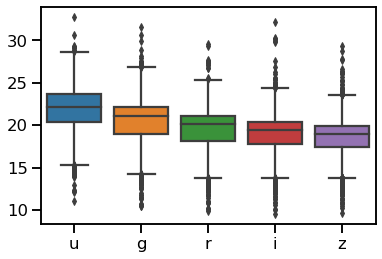

<Figure size 900x600 with 0 Axes>

In [18]:
## Setting plotting context for the following figure
sns.set_context("talk")
fig, ax = plt.subplots()
figure(figsize=(6, 4), dpi=150)

sns.boxplot(data = stellar[['u','g','r','i','z']], ax = ax)
plt.show()

fig.savefig("Features_BoxPlot.png", dpi = 300)

## Checking feature distribution by class

In [19]:
## Setting plotting style
sns.set_context("notebook")
sns.set_style("whitegrid")

In [20]:
## Function to plot violin and visualize the distribution of the selected features

def violin_plotter(by, variable, data):
    fig = plt.figure(figsize = (12,8))
    if by == "":
        sns.violinplot(y = variable, data = data).set(title = variable +" Violin Plot")
    else:
        sns.violinplot(x = by ,y = variable, data = data).set(title = variable +" Violin Plot")
    plt.show()


### Ultraviolet Filter Readings Distribution by class

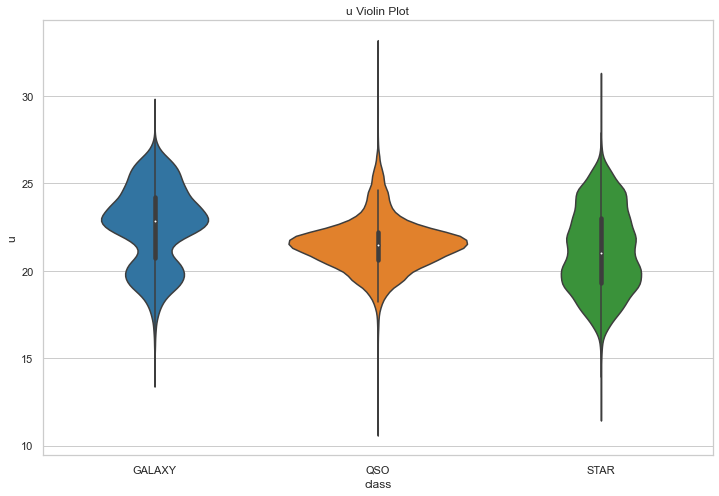

In [21]:
violin_plotter(by = "class", variable = "u", data = stellar)

### Red Filter Readings Distribution by Class

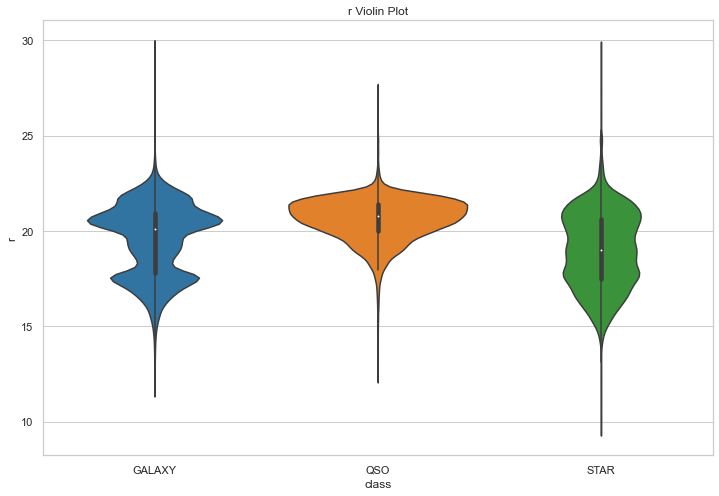

In [22]:
violin_plotter(by = "class", variable = "r", data = stellar)

### Green Filter Readings Distribution by Class

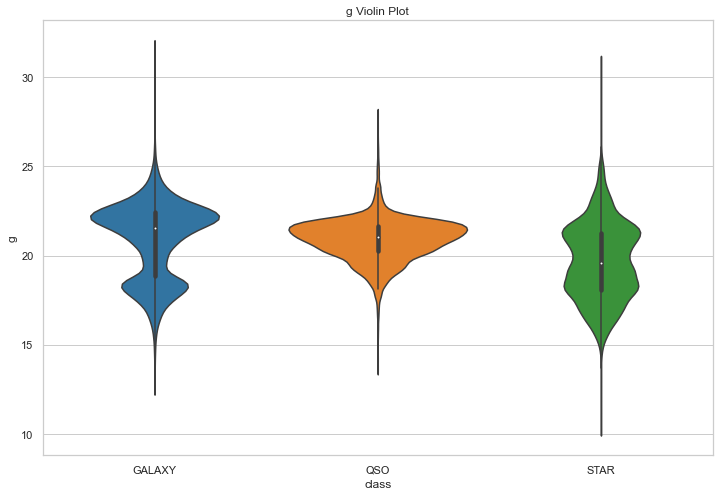

In [23]:
violin_plotter(by = "class", variable = "g", data = stellar)

### Infrared Filter Readings Distribution by Class

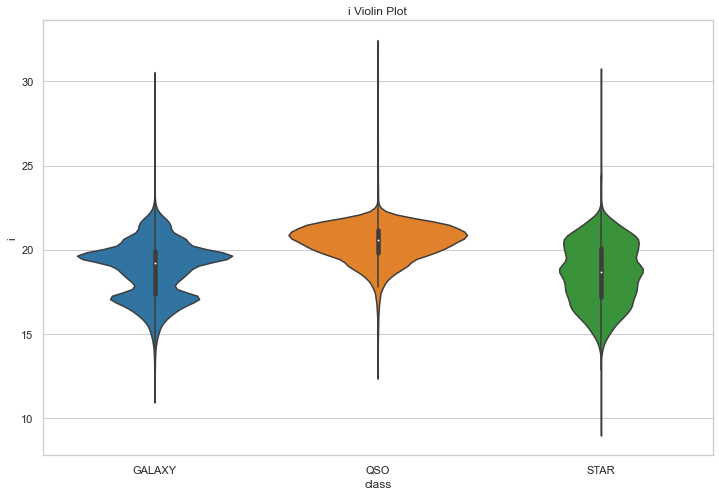

In [24]:
violin_plotter(by = "class", variable = "i", data = stellar)

### Redshift Readings Distribution

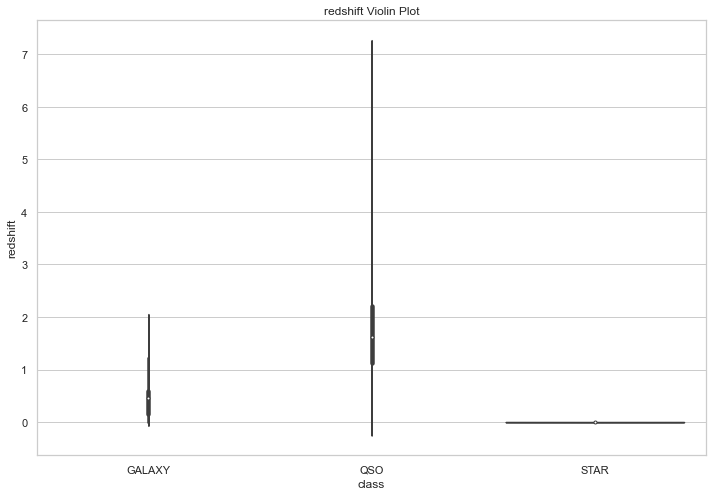

In [25]:
violin_plotter(by ="class",variable = "redshift", data = stellar)

### Redshift Readings Distribution by class
##### Plotting separately because of high variance in data. Can try log transformation to suppress this variation

#### Class - Galaxy

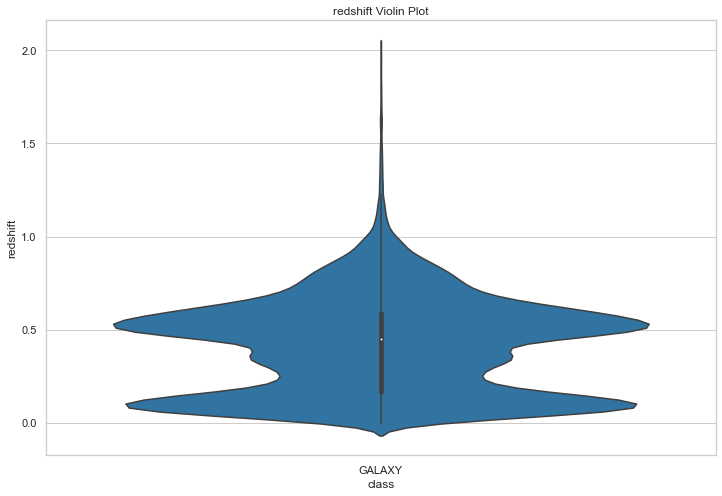

In [26]:
violin_plotter(by ="class",variable = "redshift", data = stellar[stellar["class"] == "GALAXY"])

#### Class -  Star

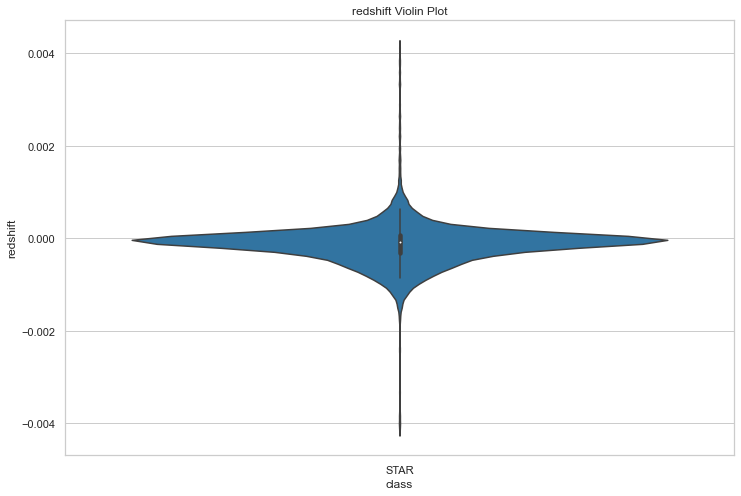

In [27]:
violin_plotter(by ="class",variable = "redshift", data = stellar[stellar["class"] == "STAR"])

#### Class - QSO

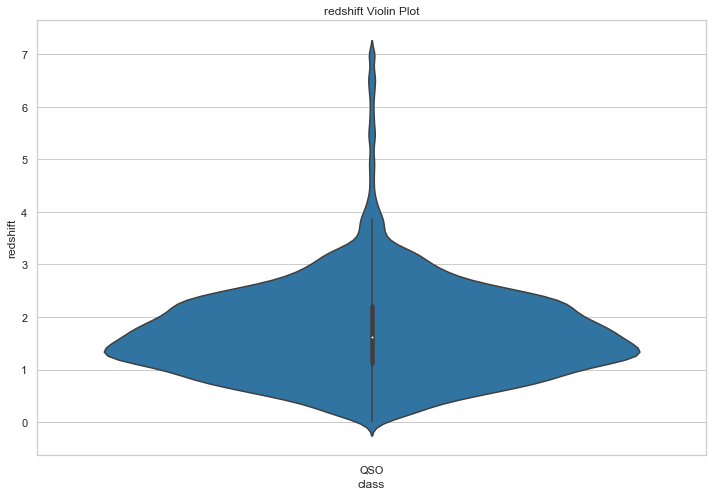

In [28]:
violin_plotter(by ="class",variable = "redshift", data = stellar[stellar["class"] == "QSO"])

From the above distributions it is quite apparent that the selected features all have different distribution by class of the stellar object.
And hence, can and should be considered for classification.

### Taking a quick look at the alpha and delta distributions and seeing if they vary by class

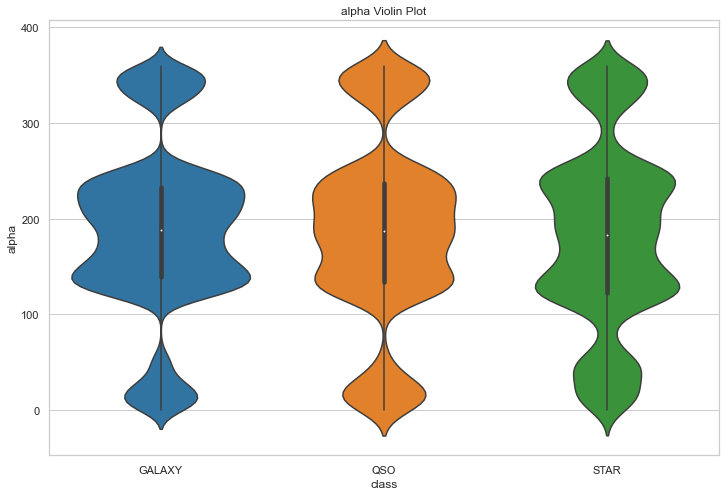

In [29]:
violin_plotter(by ="class",variable = "alpha", data = stellar)

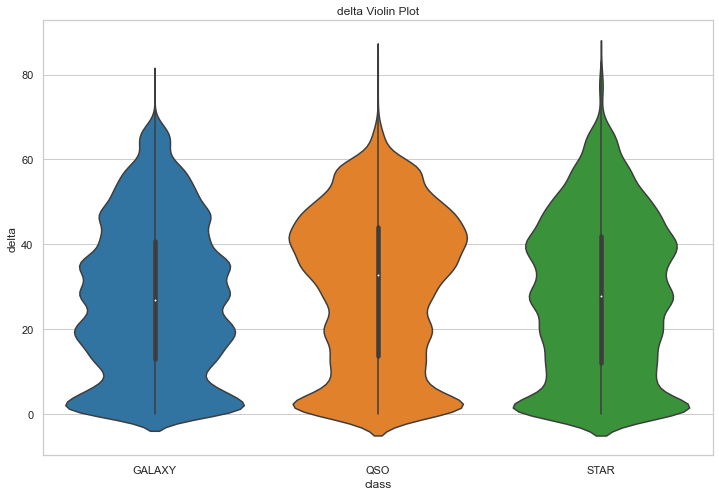

In [30]:
violin_plotter(by ="class",variable = "delta", data = stellar)

#### Not a lot.

## Class Distribution

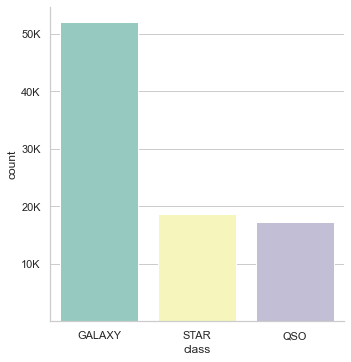

In [31]:
plot1 = sns.catplot(x = "class", data = stellar, kind = "count", order = stellar['class'].value_counts().index, palette = "Set3")
plt.yticks([10000,20000,30000,40000,50000],["10K","20K","30K","40K","50K"])
plt.show()
plot1.savefig("Class_Dist.png", dpi = 300)


There is class imbalance. But the number of instances of STAR ann QSO classes are enough to consider stratified train test split rather than oversampling with a techniques like SMOTE.


In [32]:
## Creating the final dataframe for modelling
print(features)
stellar_features = stellar[features + ['class']]

['u', 'g', 'r', 'i', 'z', 'redshift']


In [33]:
## Writing the files
stellar.to_csv("stellar.csv")
stellar_features.to_csv("stellar_features.csv")